# Income & Expenses 2022

,Month,Income,Expenses
0,1,1396.0,864.0
1,2,1439.0,1048.0
2,3,1259.0,895.0
3,4,1505.0,1127.0
4,5,1624.0,2378.0
5,6,1804.0,1673.0
6,7,3016.0,1720.0
7,8,1990.0,2009.0
8,9,2185.0,1388.0
9,10,2069.0,1842.0


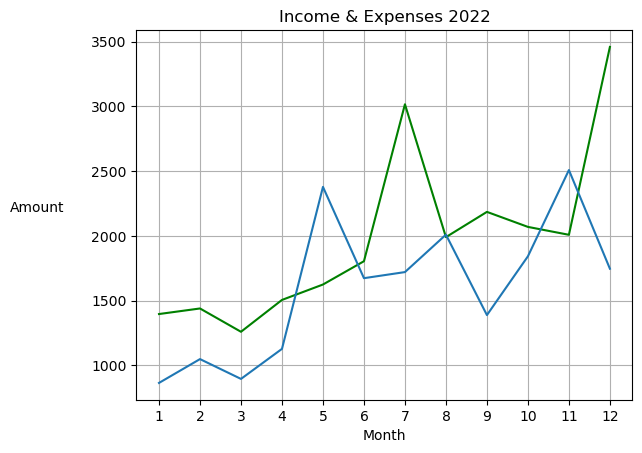

In [2]:
import matplotlib.pyplot as plt

income_2022 = bank_2022_1[bank_2022_1['Description'].str.contains('PAYROLL')].groupby(bank_2022_1['Posting Date'].dt.month)['Amount'].sum().round().reset_index(name = 'Income').rename(columns = {'Posting Date':'Month'})
expenses_2022_1 = bank_2022_1[bank_2022_1['Amount'] < 0].groupby(bank_2022_1['Posting Date'].dt.month)['Amount'].sum().abs().round().reset_index(name = 'Expenses').rename(columns = {'Posting Date':'Month'})
expenses_2022_2 = bank_2022_2.groupby(bank_2022_2['Posted Date'].dt.month)['Debit'].sum().round().reset_index(name = 'Expenses').rename(columns = {'Posted Date':'Month'})
expenses_2022 = pd.merge(expenses_2022_1, expenses_2022_2, on = 'Month')
expenses_2022['Expenses'] = expenses_2022['Expenses_x'] + expenses_2022['Expenses_y']
expenses_2022 = expenses_2022[['Month', 'Expenses']]
finance_2022 = pd.merge(income_2022, expenses_2022, on = 'Month')

fig, ax = plt.subplots()
plt.plot(finance_2022['Month'], finance_2022['Income'], color = 'green')
plt.plot(finance_2022['Month'], finance_2022['Expenses'])
plt.title('Income & Expenses 2022')
plt.xlabel('Month')
plt.xticks(finance_2022['Month'])
ax.set_ylabel('Amount', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)
plt.grid(True)

display(finance_2022)
plt.show()

# Income & Expenses 2023

,Month,Income,Expenses
0,1,2640.0,3635.0
1,2,2099.0,1863.0
2,3,1901.0,1206.0
3,4,1889.0,2468.0
4,5,1933.0,2817.0
5,6,3108.0,3881.0
6,7,1970.0,2338.0
7,8,2050.0,3142.0
8,9,2042.0,3175.0
9,10,1784.0,3266.0


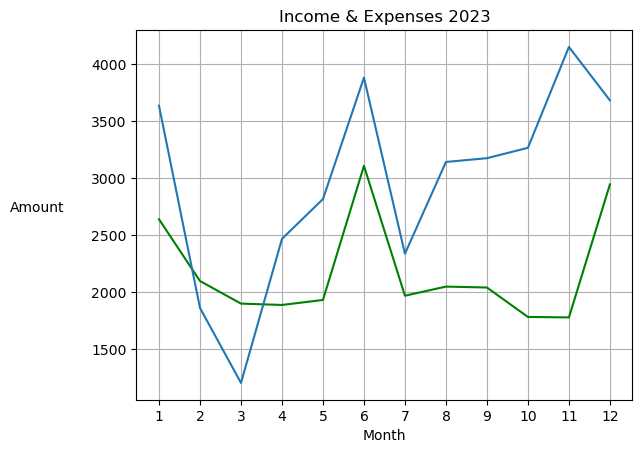

In [24]:
income_2023 = bank_2023_1[(bank_2023_1['Posting Date'].dt.month < 12) & (bank_2023_1['Description'].str.contains('PAYROLL'))].groupby(bank_2023_1['Posting Date'].dt.month)['Amount'].sum().round().reset_index(name = 'Income').rename(columns = {'Posting Date':'Month'})
income_12 = bank_12_1[bank_12_1['Description'].str.contains('PAYROLL')].groupby(bank_12_1['Posting Date'].dt.month)['Amount'].sum().round().reset_index(name = 'Income').rename(columns = {'Posting Date':'Month'})
income_2023 = pd.merge(income_2023, income_12, on = ('Month', 'Income'), how = 'outer')
expenses_2023_1 = bank_2023_1[(bank_2023_1['Posting Date'].dt.month < 12) & (bank_2023_1['Amount'] < 0)].groupby(bank_2023_1['Posting Date'].dt.month)['Amount'].sum().abs().round().reset_index(name = 'Expenses').rename(columns = {'Posting Date':'Month'})
expenses_2023_2 = bank_2023_2[bank_2023_2['Posted Date'].dt.month < 12].groupby(bank_2023_2['Posted Date'].dt.month)['Debit'].sum().round().reset_index(name = 'Expenses').rename(columns = {'Posted Date': 'Month'})
expenses_12_1 = bank_12_1[bank_12_1['Amount'] < 0].groupby(bank_12_1['Posting Date'].dt.month)['Amount'].sum().abs().round().reset_index(name = 'Expenses').rename(columns = {'Posting Date':'Month'})
expenses_12_2 = bank_12_2.groupby(bank_12_2['Posted Date'].dt.month)['Debit'].sum().round().reset_index(name = 'Expenses').rename(columns = {'Posted Date':'Month'})
expenses_2023_1 = pd.merge(expenses_2023_1, expenses_12_1, on = ('Month', 'Expenses'), how = 'outer')
expenses_2023_2 = pd.merge(expenses_2023_2, expenses_12_2, on = ('Month', 'Expenses'), how = 'outer')
expenses_2023 = pd.merge(expenses_2023_1, expenses_2023_2, on = 'Month')
expenses_2023['Expenses'] = expenses_2023['Expenses_x'] + expenses_2023['Expenses_y']
expenses_2023 = expenses_2023[['Month', 'Expenses']]
finance_2023 = pd.merge(income_2023, expenses_2023, on = 'Month')

fig, ax = plt.subplots()
plt.plot(finance_2023['Month'], finance_2023['Income'], color = 'green')
plt.plot(finance_2023['Month'], finance_2023['Expenses'])
plt.title('Income & Expenses 2023')
plt.xlabel('Month')
plt.xticks(finance_2023['Month'])
ax.set_ylabel('Amount', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)
plt.grid(True)

display(finance_2023)
plt.show()

# Total Income & Expenses

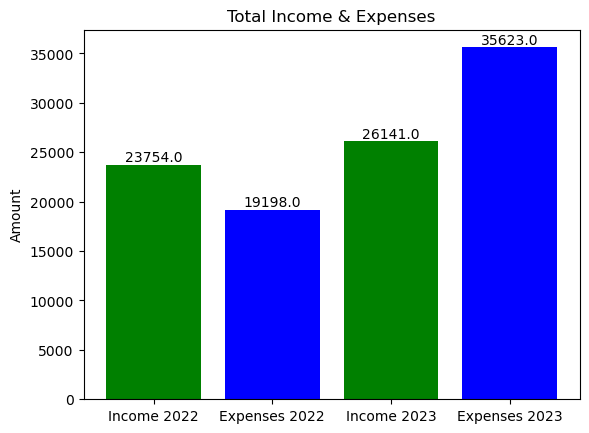

yearly income 2022 23754.0
yearly expenses 2022:  19198.0
yearly income 2023:  26141.0
yearly expenses 2023:  35623.0


In [4]:
labels = ['Income 2022', 'Expenses 2022', 'Income 2023', 'Expenses 2023']
values = [finance_2022['Income'].sum(),  finance_2022['Expenses'].sum(), finance_2023['Income'].sum(), finance_2023['Expenses'].sum()]
plt.bar_label(plt.bar(labels, values, color = ['green', 'blue', 'green', 'blue']), values)
plt.title('Total Income & Expenses')
plt.ylabel('Amount')

plt.show()
print('yearly income 2022', finance_2022['Income'].sum())
print('yearly expenses 2022: ', finance_2022['Expenses'].sum())
print('yearly income 2023: ', finance_2023['Income'].sum())
print('yearly expenses 2023: ', finance_2023['Expenses'].sum())

# Average Income

Average weekly income 2022: 914.0
Average monthly income 2022: 1980.0
Average weekly income 2023: 1005.0
Average monthly income 2023: 2178.0


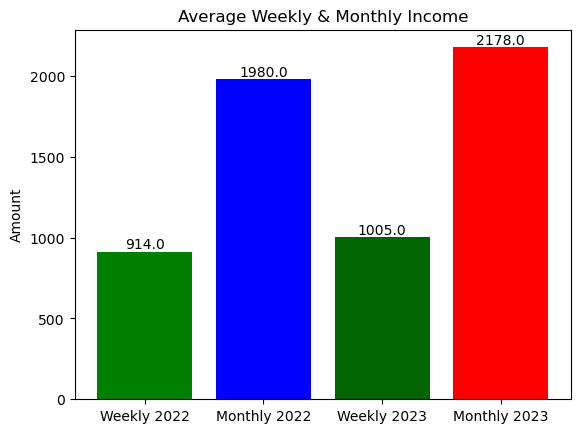

In [5]:
avg_weekly_income_2022 = bank_2022_1[bank_2022_1['Description'].str.contains('PAYROLL')].groupby(bank_2022_1['Posting Date'].dt.isocalendar().week)['Amount'].sum().round().reset_index(name = 'Income').rename(columns = {'Posting Date':'Week'})
avg_weekly_income_2023 = bank_2023_1[(bank_2023_1['Posting Date'].dt.month < 12) & (bank_2023_1['Description'].str.contains('PAYROLL'))].groupby(bank_2023_1['Posting Date'].dt.isocalendar().week)['Amount'].sum().round().reset_index(name = 'Income').rename(columns = {'Posting Date':'Week'})
avg_weekly_income_12 = bank_12_1[bank_12_1['Description'].str.contains('PAYROLL')].groupby(bank_12_1['Posting Date'].dt.isocalendar().week)['Amount'].sum().round().reset_index(name = 'Income').rename(columns = {'Posting Date':'Week'})
avg_weekly_income_2023 = pd.merge(avg_weekly_income_2023, avg_weekly_income_12, on = ('week', 'Income'), how = 'outer')

labels = ['Weekly 2022', 'Monthly 2022', 'Weekly 2023', 'Monthly 2023']
values = [avg_weekly_income_2022['Income'].mean().round(), income_2022['Income'].mean().round(), avg_weekly_income_2023['Income'].mean().round(), income_2023['Income'].mean().round()]

plt.bar_label(plt.bar(labels, values, color = ['green', 'blue', 'darkgreen', 'red']), values)
plt.title('Average Weekly & Monthly Income')
plt.ylabel('Amount')

print('Average weekly income 2022:', avg_weekly_income_2022['Income'].mean().round())
print('Average monthly income 2022:', income_2022['Income'].mean().round())
print('Average weekly income 2023:', avg_weekly_income_2023['Income'].mean().round())
print('Average monthly income 2023:', income_2023['Income'].mean().round())
plt.show()